In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
pop_df = pd.read_csv("data/pop.csv")
df = pd.read_csv("data/final.csv")
df = df.append(pop_df)
df = df.rename(str.title, axis="columns")
df = df.drop(columns=["Unnamed: 0"])
df = df[((df["Genre"] == "pop") | (df["Genre"] ==  "country"))]
genres = df["Genre"].unique()
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
]
colors = {}
i = 0
for genre in genres:
    colors[genre] = unique_colors[i]
    i+=1
colors_list = [colors[genre] for genre in genres]
df.head()

,Genre,Id,Popularity,Is_Exp,Name,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
980,country,2rxQMGVafnNaRaXlRMWPde,83,False,Beautiful Crazy,Luke Combs,0.552,0.402,11,-7.431,1,0.0262,0.67600,0.000000,0.0928,0.382,103.313,4
981,country,3L5cSHbf7oBWubuCwJbUGt,73,False,Nothing To Do Town,Dylan Scott,0.551,0.836,2,-5.182,1,0.0338,0.02490,0.000013,0.2220,0.911,147.954,4
982,country,6ERR6e7h6wCqGoz1TjiUJb,70,False,Knockin' Boots,Luke Bryan,0.739,0.682,2,-3.728,1,0.2050,0.12900,0.000000,0.3280,0.634,131.983,4
983,country,0QFvybNsiwupz72jpQWxKn,67,False,That's How You Got It,John Gurney,0.673,0.683,4,-4.224,1,0.0321,0.00181,0.000011,0.0990,0.824,89.984,4
984,country,7C6JnGZRj0HMIF06rlz9Mb,75,False,Make It Sweet,Old Dominion,0.539,0.859,7,-4.465,1,0.0399,0.03170,0.000000,0.1020,0.456,89.937,4


In [3]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [4]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

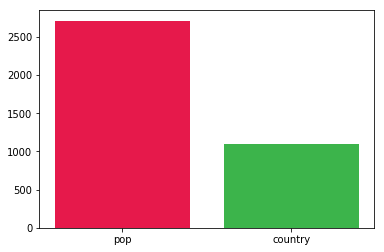

In [12]:
hist_data = dict(y.value_counts())
keys = list(hist_data.keys())
vals = list(hist_data.values())
plt.bar(keys,vals ,color=colors_list)
plt.show()

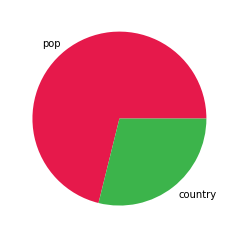

In [15]:
plt.pie(vals,labels=keys ,colors=colors_list)
plt.show()

In [16]:
X.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
count,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.00000,3811.000000
mean,0.631162,0.598401,5.294149,-7.301591,0.701128,0.074954,0.302874,0.020029,0.167608,0.520005,118.61404,3.952506
std,0.132717,0.193928,3.605961,3.120523,0.457824,0.077430,0.284744,0.102962,0.125121,0.226098,28.33631,0.284510
min,0.142000,0.021000,0.000000,-24.385000,0.000000,0.022800,0.000003,0.000000,0.021900,0.037600,37.39900,1.000000
25%,0.549000,0.465500,2.000000,-8.835000,0.000000,0.033600,0.053300,0.000000,0.095400,0.342000,97.00000,4.000000
50%,0.637000,0.619000,5.000000,-6.544000,1.000000,0.045400,0.204000,0.000001,0.121000,0.515000,115.74100,4.000000
75%,0.726000,0.747000,8.000000,-5.114000,1.000000,0.076450,0.518000,0.000096,0.191000,0.690000,136.04100,4.000000
max,0.966000,0.993000,11.000000,0.366000,1.000000,0.830000,0.995000,0.959000,0.948000,0.982000,213.84000,5.000000


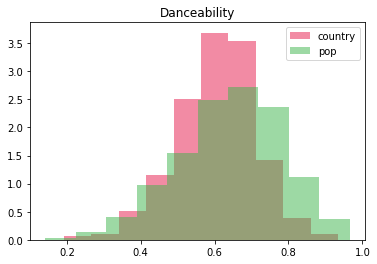

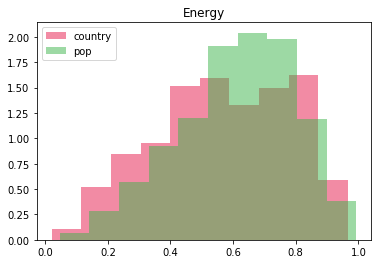

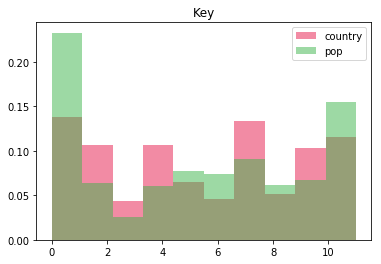

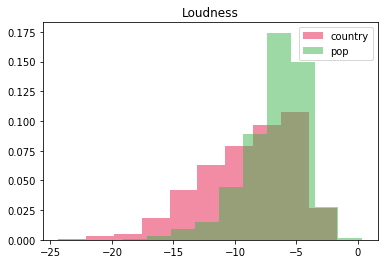

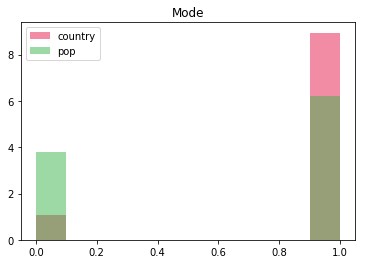

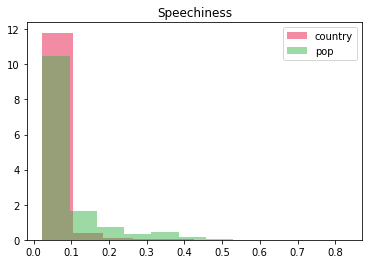

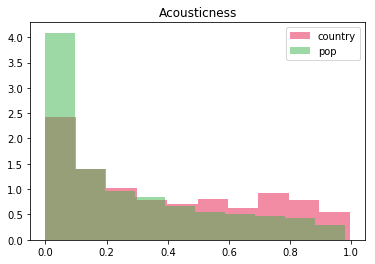

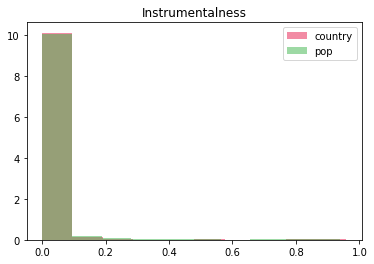

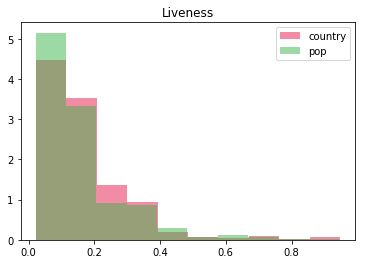

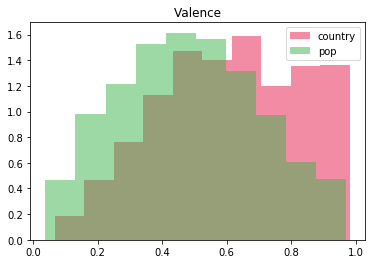

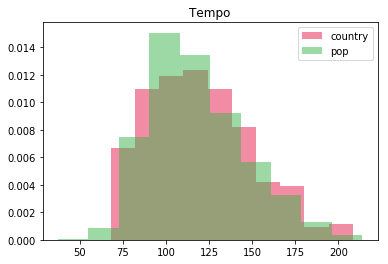

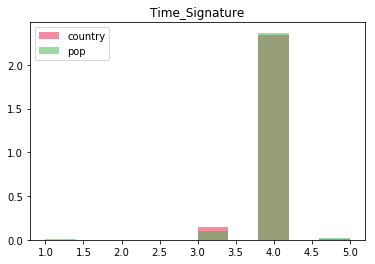

In [17]:
for label, content in X.iteritems():
    if label != "Is_Exp":
        for genre in genres:
            plt.hist(content[df["Genre"] == genre],label=genre,color=colors[genre],density=1,alpha=.5)
            plt.title(label)
        plt.legend()
        plt.show()

In [25]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2"])

<IPython.core.display.Javascript object>


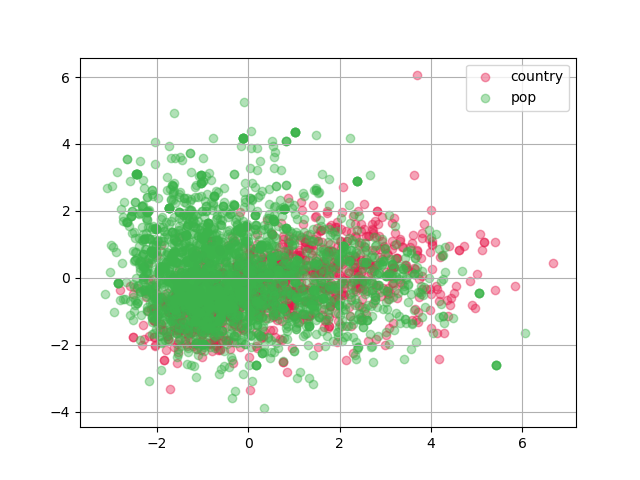

In [26]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)


for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    xs   = prin_df["PC1"][mask]
    ys   = prin_df["PC2"][mask]
    ax.scatter(xs,ys, c=color,alpha=.4)

ax.legend(genres)
ax.grid()

<IPython.core.display.Javascript object>


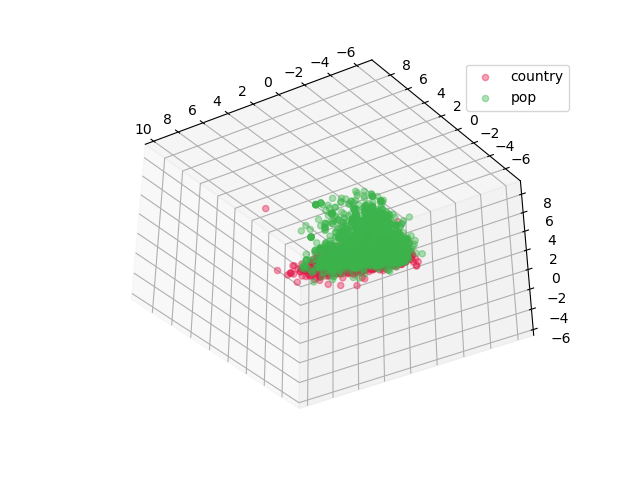

In [27]:
%matplotlib notebook

pca = PCA(n_components=3)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2","PC3"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], prin_df["PC3"][mask], c=color,alpha=.4)

    
ax.legend(genres)
ax.grid()